In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Data 
df=pd.read_csv(r"D:\Stats-Up\Post_1\Clean_Dataset.csv")
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
#Dimension of the data
df.shape

(300153, 11)

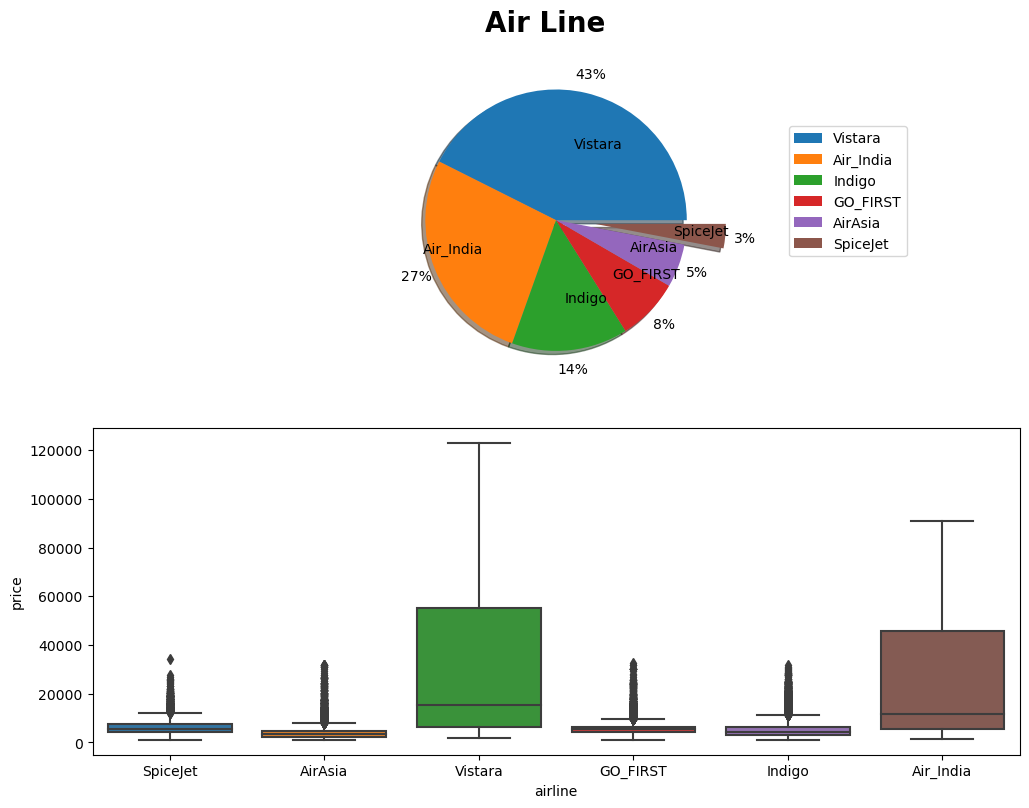

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Air Line', fontsize=20, fontweight='bold')
plt.tight_layout()
labels = df.airline.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(df.airline.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.15, labeldistance=0.6, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)
sns.boxplot(x='airline', y='price', data=df, ax=ax[1])
plt.show()

Usage of flights:

* Most used airline is Vistara (43% of all flights, 127859 flights)
* Second place is Air_India (27% of all flights, 80892 flights)
* Less used airline is SpiceJet (3% of all flights, 9011 flights)

Price variation with Airlines:

* Vistara has Maximum Price range
* Vistara and Air_India Airlines Have Maximum Price when compared to Others
* SpiceJet , AirAsia , GO_First and Indigo has some what equal prices

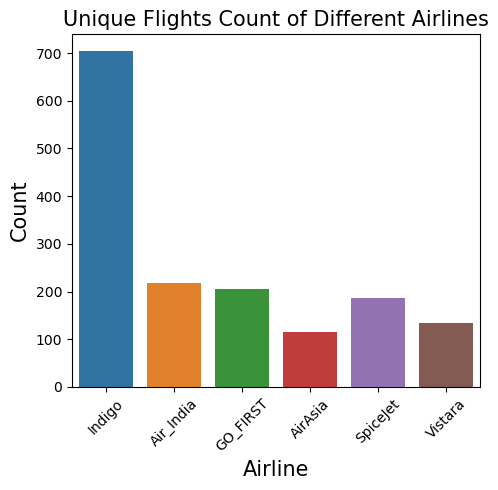

In [5]:
##Unique Flight Count 
df1=df.groupby(['flight','airline'],as_index=False).count()
value_counts = df1['airline'].value_counts()
plt.figure(figsize=(5, 5))
sns.countplot(data=df1, x='airline')
plt.title('Unique Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Indigo has the highest number of unique flight counts**

                price
0  mean  20889.660523
1   50%   7425.000000


<Axes: xlabel='price'>

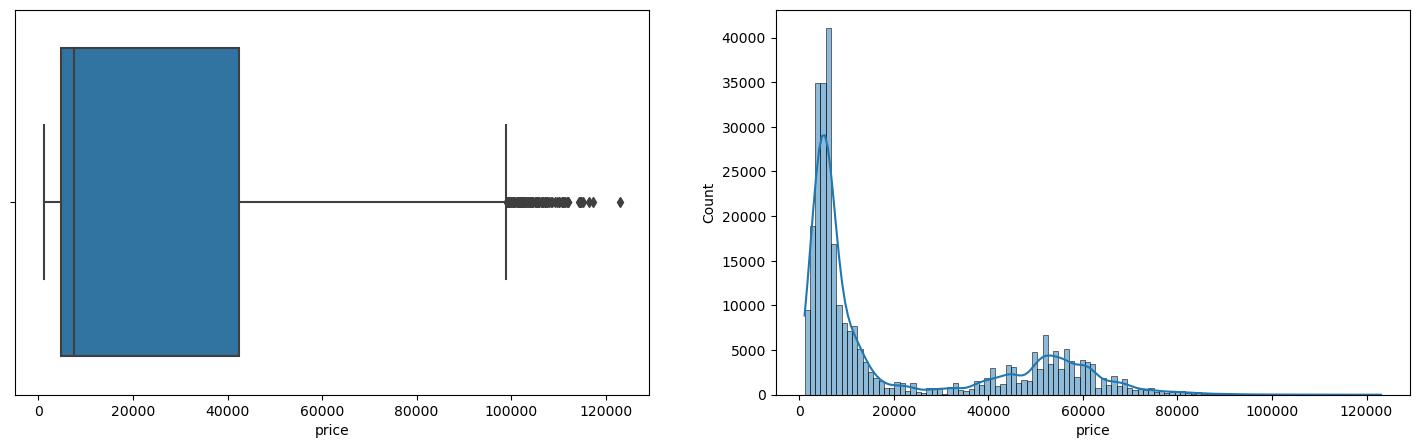

In [6]:
print(df[['price']].describe(include='all').reset_index().rename(columns={'index':''}).iloc[[1, 5]].reset_index(drop=True))
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = df, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = df)

 * Notice, here the mean is around 20000, but the median is approximately 7500. 
 * This difference is explainable by the presence of two different tickets: business and economy. 
 * On the second graph, we can clearly see that the two different populations composed by two gaussian curves.

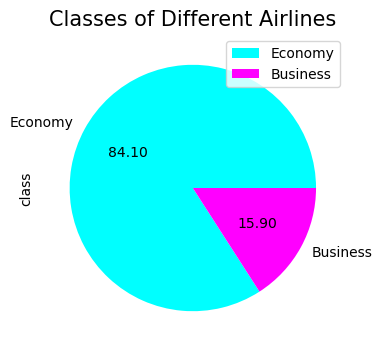

In [7]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
plt.figure(figsize=(4,4))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

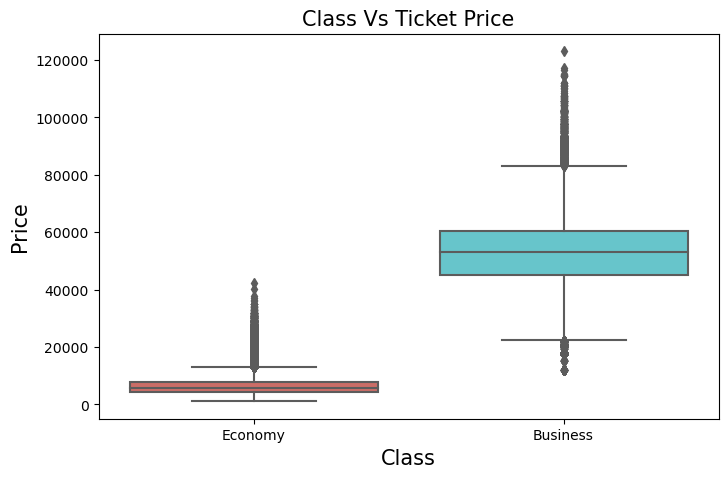

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


How Does the Ticket Price vary between Economy and Business Class?

**Ticket Price is Maximum for Bussiness Class When compared to Economy Class**

Text(0.5, 1.0, 'Airline prices based on the class and company')

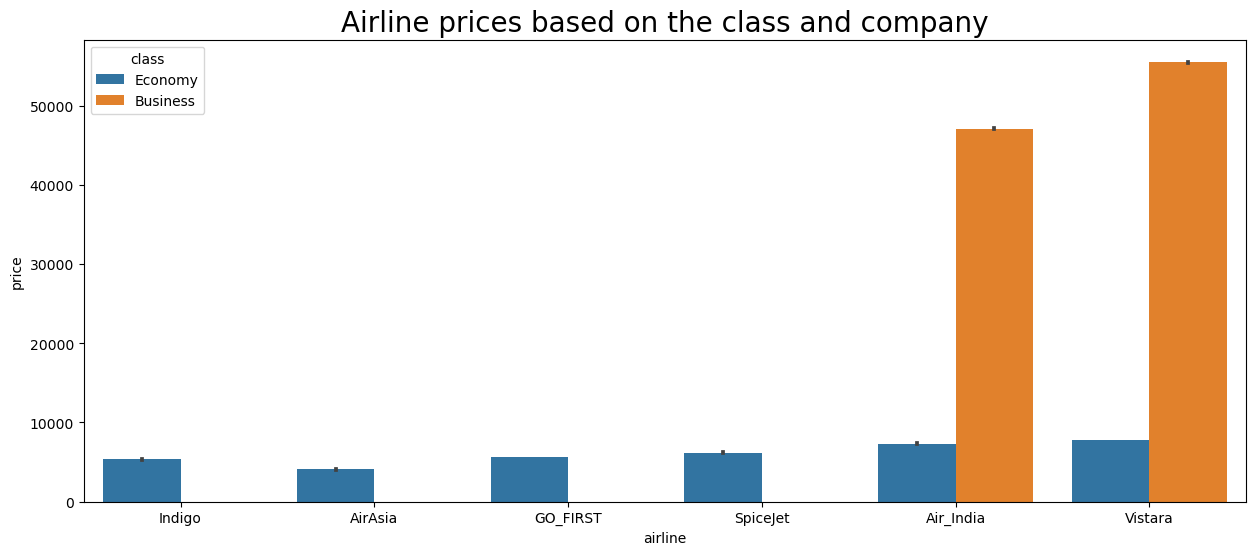

In [9]:
plt.figure(figsize=(15, 6))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

* Business flights are only available in two companies: Air India and Vistara. 
* There is a big gap between the prices in the two class that reaches almost 5 times the price of Economy for Business tickets.

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

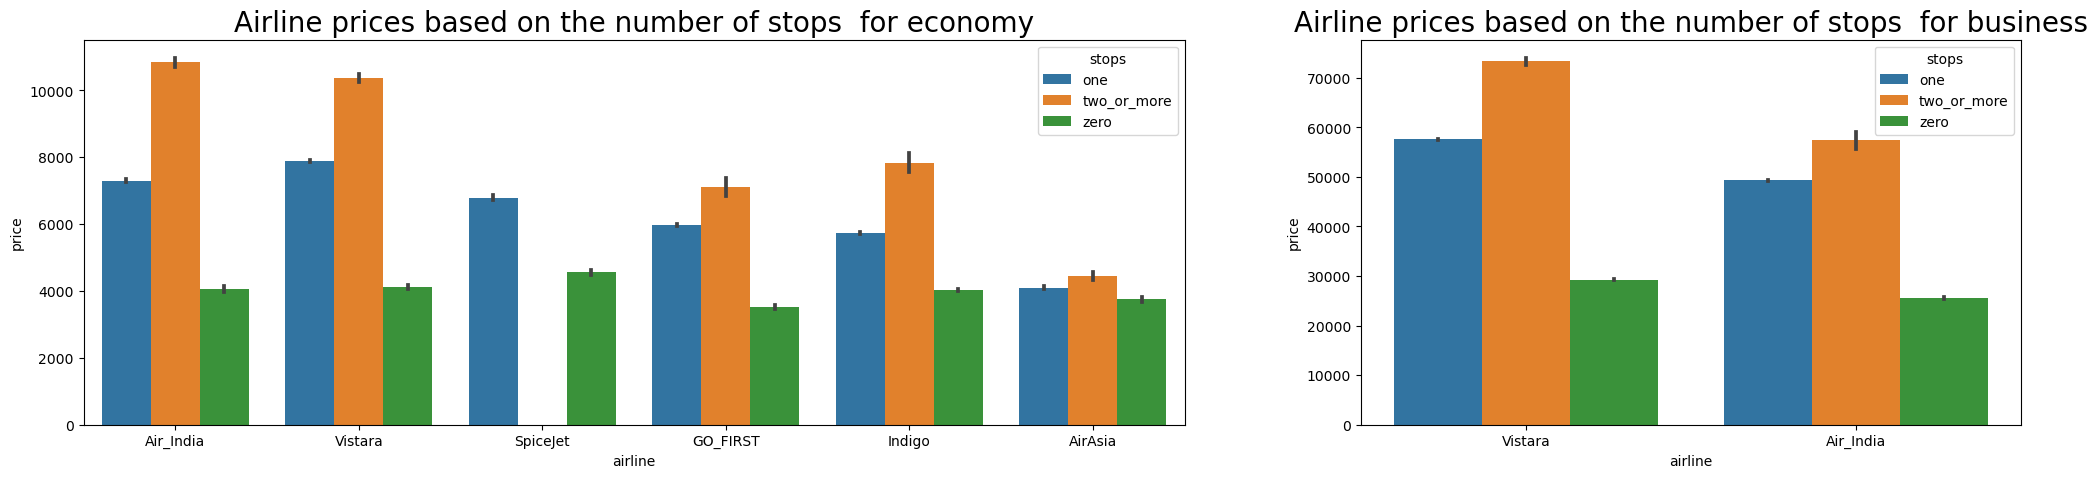

In [10]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

How Does the Ticket Price vary with the number of stops of a Flight?

**Flights having one stop has maximum ticket price**

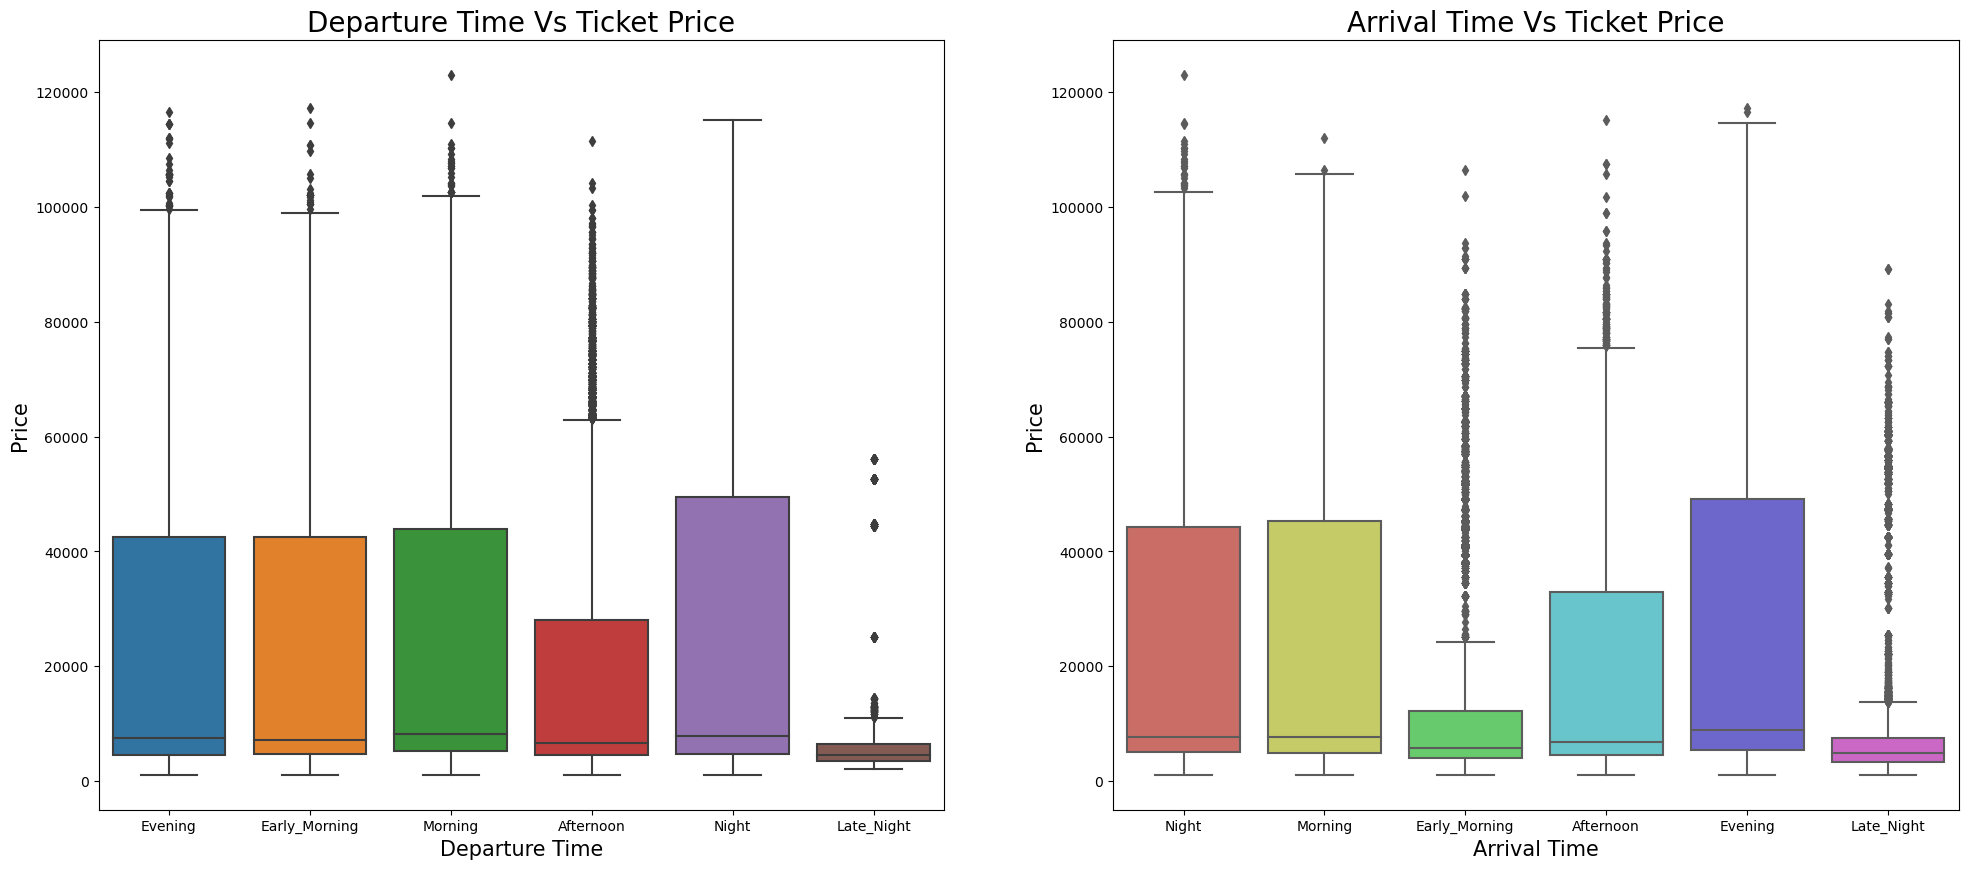

In [11]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

How the Ticket Price change based on the Departure Time and Arrival Time?
1. Departure Time Vs Ticket Price

* Ticket Price is More for the Flights when the Departure Time is at Night
* Ticket Price is Low for the Flights Having Departure Time at Late_night

2. Arrival Time Vs Ticket Price

* Ticket Price is More for the Flights when the Arrival Time is at Evening
* Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time

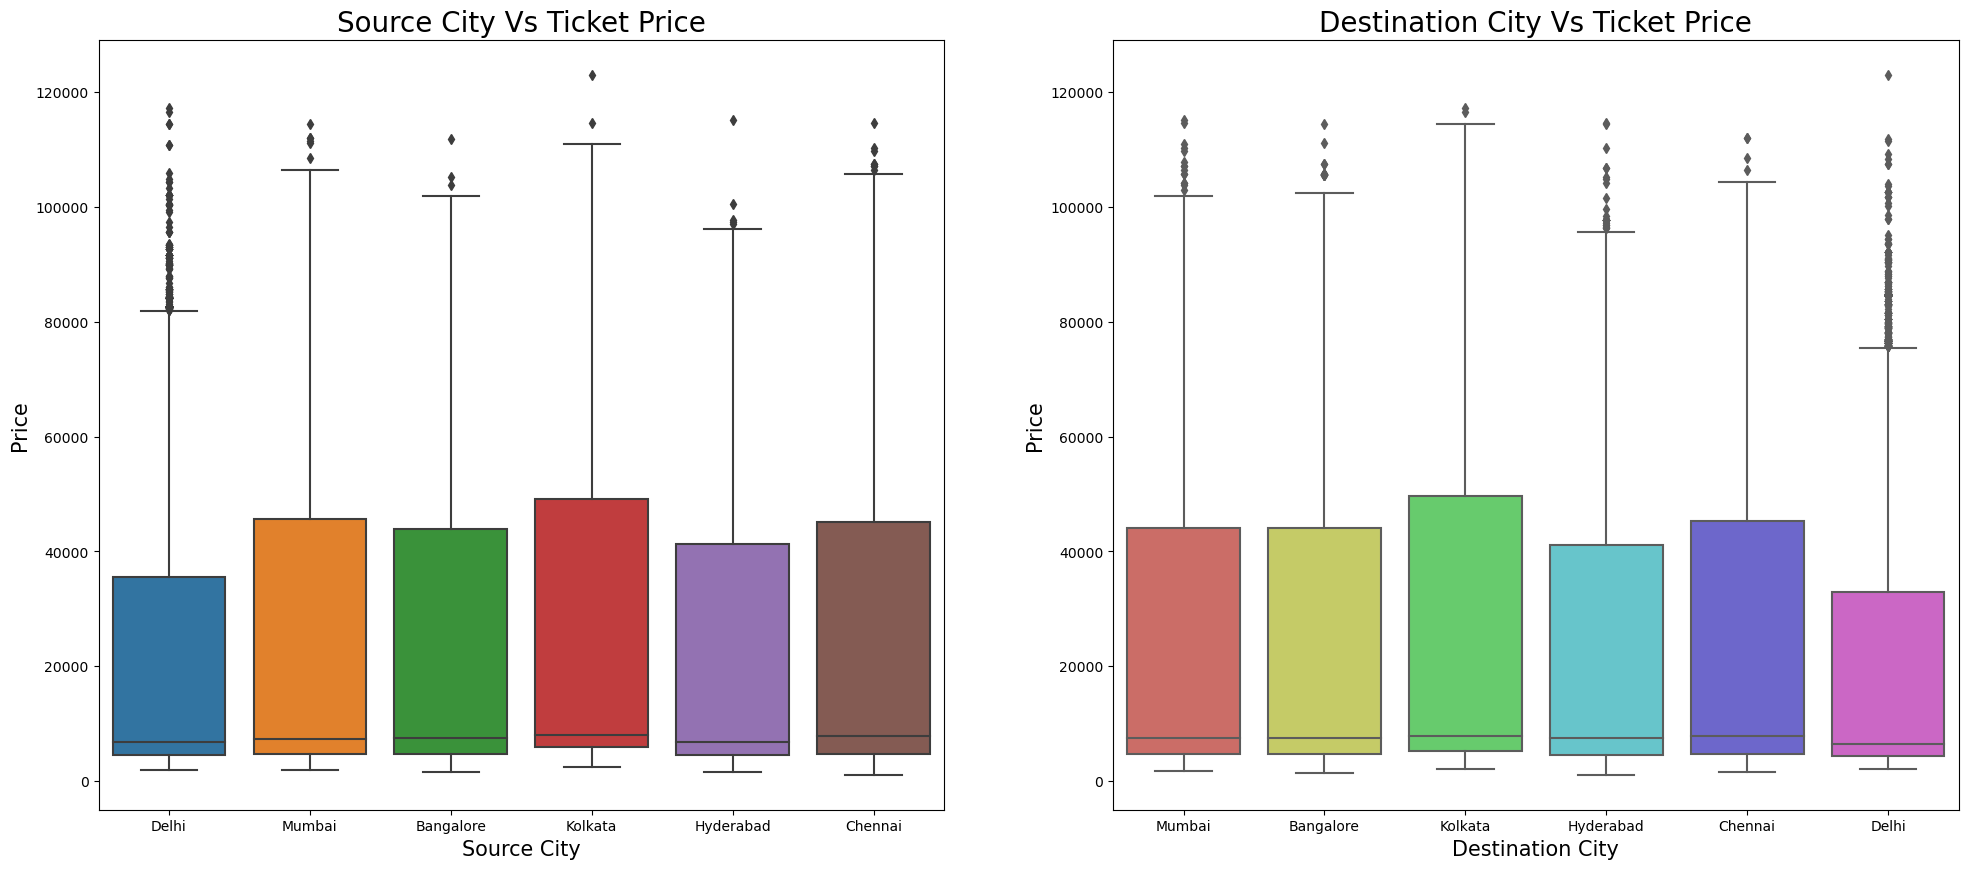

In [12]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

How the price changes with change in Source city and Destination city?
1. Source City Vs Ticket Price

* Ticket Price is More for the Flights whose Source City is Kolkata
* Ticket Price is Low for the Flights Having Source City as Delhi

2. Destination City Vs Ticket Price

* Ticket Price is More for the Flights whose Destination City is kolkata and Chennai
* Ticket Price is Low for the Flights Having Destination City as Delhi

How Price Varies with the Flight Duration Based on Class?

With increase in Duration, the Ticket Price is also Increases In both the Economy and Business classes

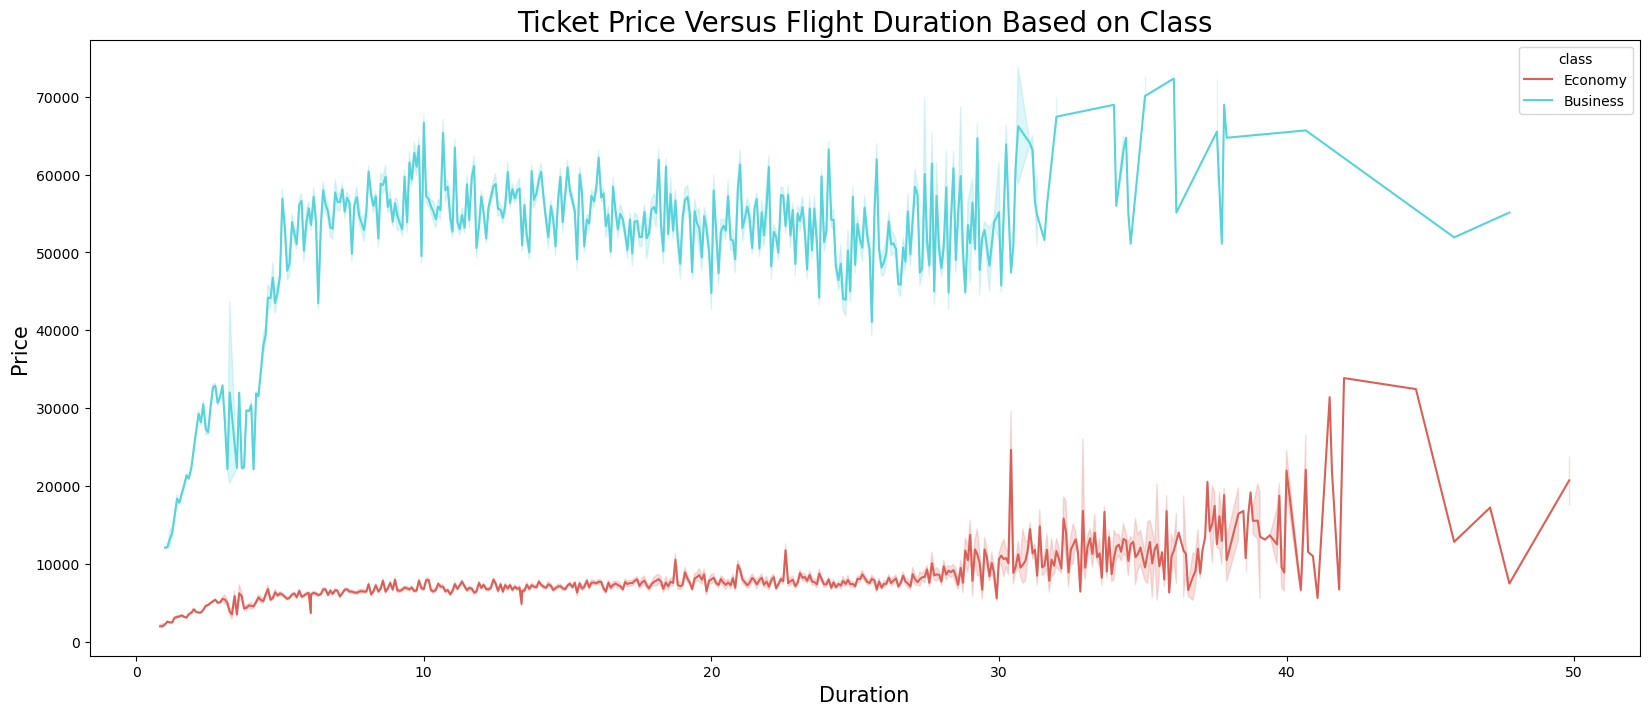

In [13]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

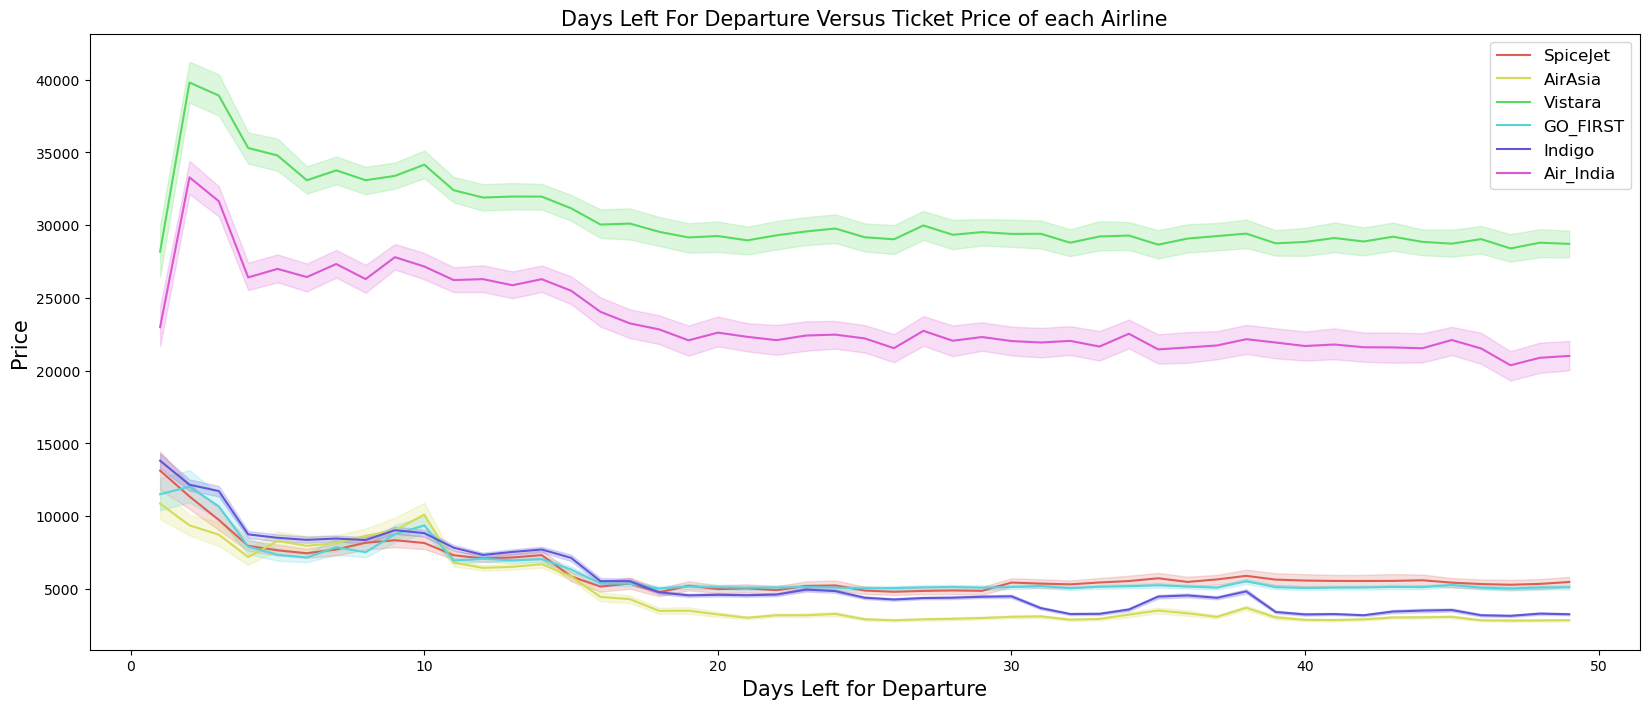

In [14]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

How does the price affected on the days left for Departure?

**When there are two days remaining for departure, then the Ticket Price is very High for all airlines**

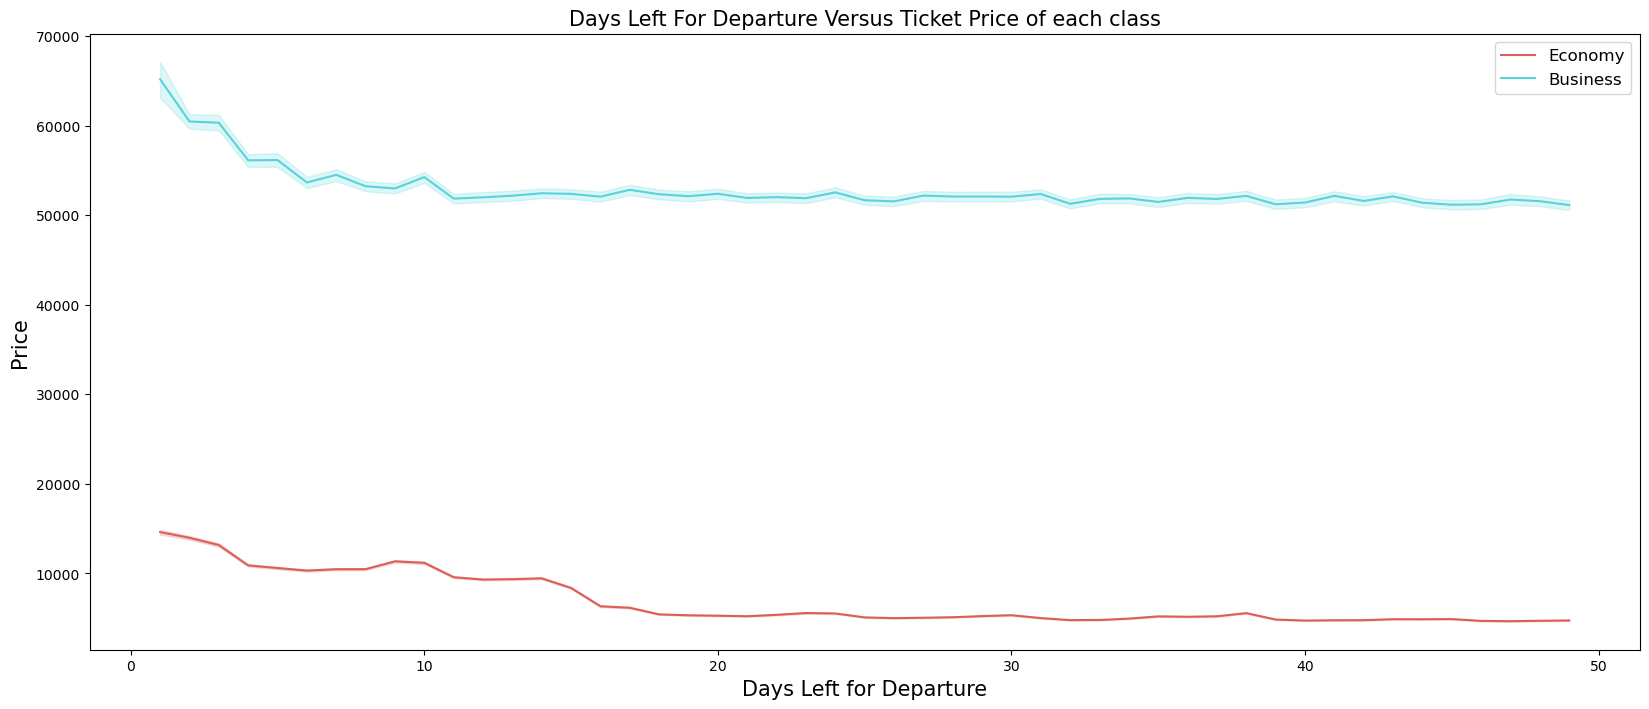

In [15]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='class',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each class',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**Total number of Flights from one city to another**

In [16]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


**Lowest Average Price of different Airlnes from Source city to Destination city**

In [17]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(5)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350


**Highest Average Price of different Airlnes from Source city to Destination city**

In [18]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().tail(5)

,airline,source_city,destination_city,price
172,Vistara,Mumbai,Bangalore,35029.880315
173,Vistara,Mumbai,Chennai,32181.946251
174,Vistara,Mumbai,Delhi,26402.695114
175,Vistara,Mumbai,Hyderabad,29497.578017
176,Vistara,Mumbai,Kolkata,35223.862417
